## 1.데이터

### 1)데이터 로드

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from khaiii import KhaiiiApi
import pandas as pd
import re
import numpy as np
from PIL import Image
import urllib
import requests

# 파일 로드
data = pd.read_excel('/home/lab543/jupyter/jinyoung/data/demisoda_oranC_v4.xlsx')

# 데이터 확인
print(len(data))
data.head()

1135


,keyword,category,date,title,username,content,click,link,channel,site
0,EDC 데미소다,default,2019-08-30,푸드투데이 오늘 뉴스 - [이슈점검] 농민 보호 팽개친 농협 하나로마트의 '위험한 ...,푸드투데이,[푸드TV] 국회로 간 4-H 청소년 차세대 리더로 거듭나다[푸드투데이 = 홍성욱 ...,NaN,https://m.blog.naver.com/foodtoday1?Redirect=L...,default,naverBlog
1,EDC 데미소다,default,2019-08-30,[푸드투데이] 동아오츠카 데미소다 ‘EDC KOREA 2019’ 이벤트 진행,푸드투데이,동아오츠카 데미소다 ‘EDC KOREA 2019’ 이벤트 진행[푸드투데이 = 조성윤...,NaN,https://m.blog.naver.com/foodtoday1?Redirect=L...,default,naverBlog
2,EDC 데미소다,default,2019-09-01,동아오츠카 데미소다 EDC코리아 축제 참여,KoreaTourPress,동아오츠카가 데미소다브랜드로 '일렉트릭 데이지 카니발 코리아 2019 개최를 맞아 ...,NaN,https://m.blog.naver.com/tour_bangbang?Redirec...,default,naverBlog
3,EDC 데미소다,default,2019-09-01,edc korea 1일차 후기 티미트럼펫 넘조와,June28,edc korea 1일차 후기​‐도보 이용-GA 2일권-맥주 두잔 반-롯데리아 빅불...,NaN,https://m.blog.naver.com/momentum628?Redirect=...,default,naverBlog
4,EDC 데미소다,default,2019-09-01,edc korea 2019 첫째날 토요일 후기 & 팁,anna,edc korea 2019 첫째날 토요일 후기 & 팁​https://youtu.be...,NaN,https://m.blog.naver.com/softmint3?Redirect=Lo...,default,naverBlog


In [4]:
data['keyword'].value_counts()

미린다             630
써니텐             227
펩시 탑텐           107
오란씨 믹스맥스페스티벌     62
환타 헤드            44
EDC 데미소다         27
오란씨 CM송          26
UMF 데미소다         12
Name: keyword, dtype: int64

### 2)키워드 선정

In [5]:
k = '미린다'
keyword_data = data[data['keyword'] == k].reset_index().drop(['index'], axis =1)
len(keyword_data)

630

## 2.전처리

In [16]:
text_data = keyword_data['content']

url = "(https?://)?(www.)?[a-zA-Z0-9./?=&-_]+[.]?[/][a-zA-Z0-9./?=&-_%]+"
email = "[-_.+a-zA-Z0-9]+[@].+[.][[a-zA-Z0-9]+|[a-zA-Z0-9]+[.][a-zA-Z0-9]+]"

for i in range(len(text_data)):
    text_data[i] = re.sub(url,"", str(text_data[i]))
    text_data[i] = re.sub(email,"", text_data[i])
    text_data[i] = re.sub("[^가-힣a-zA-Z ]","", text_data[i])
    text_data[i] = text_data[i].lower()

/home/lab543/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/lab543/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/lab543/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/lab543/.local/lib/python3.6/site-package

In [ ]:
import time
from khaiii import KhaiiiApi

# 보완 필요 - 1차원적인 해결법
text_data = text_data[(text_data != '  ')&(text_data != '   ')].reset_index().drop(['index'],axis=1)
text_data = text_data[0]

noun ='[ㄱ-ㅎ가-힣a-zA-Z]{2,}(?=\/NNG)|[ㄱ-ㅎ가-힣a-zA-Z]{2,}(?=\/NNP)'
forign = '[ㄱ-ㅎ가-힣a-zA-Z]{2,}(?=\/SL)'
adjective = '[ㄱ-ㅎ가-힣a-zA-Z]{2,}(?=\/VA)'
verb = '[ㄱ-ㅎ가-힣a-zA-Z]{2,}(?=\/VV)'

word = list()
n = re.compile(noun+'|'+forign+'|'+adjective+'|'+verb)

start = time.time()

for i in range(len(text_data)):
    for text in KhaiiiApi().analyze(text_data[i]):
        temp = str(text).split("\t")[1].split('+')
        word.extend(n.findall(str(temp)))

print("time:",time.time() - start)

In [15]:
kha = KhaiiiApi()
mor = list()

for i in range(len(title)):
    temp_mor = list()
    try:
        for content in kha.analyze(title[i]):
            temp = str(content).split("\t")[1].split('+')
            temp_mor.extend(temp)
        mor.append(temp_mor)
    except:
        continue
print(mor[6])

['이제/MAG', '페/NNP ', ' 이코인/NNG ', ' 으로/JKB', 'KFC/SL', '치킨/NNG ', ' 을/JKO', '먹/VV ', ' 을/ETM', '수/NNB', '있/VV ', ' 습니다/EC', 'KFC/SL', '모바일/NNG ', ' 앱이/NNP ', ' 랑/JKB', '징거벨오더/NNG', '서비스/NNG', '이용/NNG ', ' 하/XSV ', ' ㄹ/ETM', '때/NNG', 'PCI/SL ', ' 로/JKB', '결제/NNG ', ' 하/XSV ', ' ㄹ/ETM', '수/NNB', '있/VV ', ' 다고/EC', '하/VV ', ' 네/NNP ', ' 용/XSN', '도미노피자/NNG', '달콤커피/NNG', '편의점/NNG', '아이템매니아/NNG ', ' 에/JKB', '잇/VV ', ' 어서/MAG', '이제/MAG', 'KFC/SL ', ' 까지/JX', '앞/NNG ', ' 으로/JKB', 'PCI/SL ', ' 로/JKB', '결제/NNG', '하/VV ', ' ㄹ/ETM', '수/NNB', '있/VV ', ' 는/ETM', '서비스/NNG ', ' 들/XSN ', ' 이/JKS', '더/MAG', '더/MAG', '늘어날/VV ', ' 듯/EC', '하/VV ', ' ㅂ니다/EC']


In [16]:
# 명사 추출
noun = list()
n = re.compile('[ㄱ-ㅎ가-힣a-zA-Z]{2,}(?=\/NNG)|[ㄱ-ㅎ가-힣a-zA-Z]{2,}(?=\/NNP)|[ㄱ-ㅎ가-힣a-zA-Z]{2,}(?=\/SL)')

for i in range(len(mor)):
    noun.append(n.findall(str(mor[i])))

In [17]:
# 명사 빈도 파악
from collections import Counter
t_noun = list()
for _ in noun:
    t_noun.extend(_)
t_noun_s = pd.DataFrame(t_noun, columns=['word'])
t_noun_s.groupby('word').size().reset_index(name='count').sort_values(['count'], ascending=False).head(60)

,word,count
246,결제,421
2627,코인,229
548,다날,200
2769,페이,147
2788,페이프로토콜,139
1309,상장,112
2027,이벤트,105
125,가능,104
1251,사용,92
1329,생각,83


In [18]:
title[title.str.contains('이낸')].head(10)

32     년 국내 블록체인 시장은 별다른 성과를 내지 못하였다실생활에 접목된 블록체인 프로젝...
38     아침에 페이코인 떨어지는거 보다가 또다시오르길래 에 걸어놓고 오후에 봤는데 다안사졌...
144     요즘 제가 관심 갖는 코인인 페이 프로토콜 코인 만든 회사가 인터넷 결제 전문업체...
211    지금 런치패드 열풍인거 알제 바이낸스 후오비 오케이코인 쿠코인 등등 런치패드로 적게...
222    비트박스 링크코인  일본거래소 승인시에 펌핑많이함 체인엑스 체인토큰  런치패드 발표...
Name: content, dtype: object

In [19]:
# 바꾸기
pre_noun = list()

pre_noun = [[re.sub('블록체$|^블록$|^체인$','블록체인',noun_) for noun_ in nouns] for nouns in noun]
pre_noun = [[re.sub('^비트.{0,}|.{0,}트코인$','비트코인',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^영업.{0,}','영업이익',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^사이버.{0,}','사이버해킹',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^힌트체.{0,}','힌트체인',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^캐리프.{0,}|.{0,}토콜','캐리프로토콜',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('의원블록체','블록체인미디어협회',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^임시$','임시총회',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^건전$','건전성',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^스피$','보이스피싱',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('머니투데','머니투데이',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^자산$','가상자산',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^가상$','가상화폐',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^암호$','암호화폐',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^대포$','대포통장',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^록체인협$','블록체인협회',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^협회다양$','블록체인협회',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^비트코$','비트코인',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^산불피$','산불피해',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^국민속$','국민',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^도민환원$','도민환원제',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('.{0,}김병욱$','김병욱',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^그라운드$','그라운드X',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^시키$','해시키',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^테라루$','테라루나',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^리브$|^브라$','리브라',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^에픽세$','에픽세븐',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^오비$|^후오$|^오비코리아$','후오비',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^클레이$','클레이튼',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^프리미$','프리미어',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^포레$','포레스팅',noun_) for noun_ in nouns] for nouns in pre_noun]


# 제거
pre_noun = [[re.sub('^화폐$','',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^보이$','',noun_) for noun_ in nouns] for nouns in pre_noun]
pre_noun = [[re.sub('^통장$','',noun_) for noun_ in nouns] for nouns in pre_noun]



result = list()
for i in range(0,len(pre_noun)):
    l = [x for x in pre_noun[i] if x]
    result.append(l)

In [20]:
# 페이코인
pre_noun = [[re.sub('^페이코$|^이코인$','페이코인',noun_) for noun_ in nouns] for nouns in pre_noun]

In [21]:
result

[['이웃',
  '블로거',
  'HANS',
  '페이',
  '캐리프로토콜',
  'PayProtocol',
  'Wallet',
  '설치',
  '암호화폐',
  '코인',
  '무료',
  '진짜',
  '까요즘',
  '암호화폐',
  '대중',
  '이야기',
  '비트코인',
  '코인',
  '이더리움',
  '이름',
  '정도',
  '투자',
  '결제',
  '암호화폐',
  '가상화폐',
  '가치',
  '실제',
  '실감',
  'HANS',
  '블로그',
  '세븐일레븐',
  '결제',
  '사용',
  '호기심',
  '페이프로',
  '월렛',
  '사용',
  '암호화폐',
  'PCI'],
 ['디고',
  '밋업',
  '사람',
  '밋업',
  '캐리프로토콜',
  '다코박',
  '관련',
  '프로젝트',
  '요약',
  '에어드랍',
  '후훗밋업',
  '페이',
  '캐리프로토콜',
  '질문',
  '시간',
  '다김영일',
  '팀장',
  '진행',
  '요국',
  '강점',
  '해외',
  '중점',
  '캐리프로토콜',
  '떡상',
  '팀장',
  '승진',
  '승진',
  '유저',
  '캐리프로토콜',
  '떡상'],
 ['결제'],
 ['블록체인',
  '실사',
  '용화',
  '중요',
  '통합',
  '결제',
  '플랫폼',
  '음식점',
  '코인',
  '커피숍',
  '코인',
  '마트',
  '코인',
  '결제',
  '코인',
  '결제',
  '블록체인',
  '시장',
  '활성',
  '당장',
  '커피',
  '사용',
  '코인',
  '요즘',
  '핫하',
  '달콤커피',
  '이코인',
  '달콤',
  '커피',
  '제휴',
  '페이코',
  '메인넷',
  '오프라인',
  '실사',
  '코인',
  '실사',
  '기존',
  '코인',
  '차별',
  '수수료',
  '절감',
  '송금',
  '정책',
  '캐리프로

In [22]:
import gensim
bigram = gensim.models.Phrases(pre_noun)
trigram = gensim.models.Phrases(bigram[pre_noun])
bigram_model = gensim.models.phrases.Phraser(bigram)
trigram_model = gensim.models.phrases.Phraser(trigram)

In [23]:
from gensim import corpora
bigram_doc = [bigram_model[nouns] for nouns in pre_noun]
bigram_doc[0]

['이웃',
 '블로거',
 'HANS',
 '페이_캐리프로토콜',
 'PayProtocol',
 'Wallet',
 '설치',
 '암호화폐_',
 '코인',
 '무료',
 '진짜',
 '까요즘',
 '암호화폐_',
 '대중',
 '이야기',
 '비트코인',
 '코인',
 '이더리움',
 '이름',
 '정도',
 '투자',
 '결제',
 '암호화폐',
 '가상화폐_',
 '가치',
 '실제',
 '실감',
 'HANS',
 '블로그',
 '세븐일레븐',
 '결제',
 '사용',
 '호기심',
 '페이프로_월렛',
 '사용',
 '암호화폐_',
 'PCI']

In [24]:
id2word = corpora.Dictionary(bigram_doc)
corpus = [id2word.doc2bow(doc) for doc in bigram_doc]
corpus[1]

[(28, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 2),
 (37, 2),
 (38, 1),
 (39, 2),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 3),
 (49, 2),
 (50, 1),
 (51, 1),
 (52, 1)]

In [25]:
from gensim.models import CoherenceModel
coherence_score = []
for i in range(2,10):
    model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = id2word, num_topics=i, passes=30, iterations=200)
    coherence_model = CoherenceModel(model, texts = bigram_doc, dictionary = id2word, coherence='c_v')
    coherence_lda = coherence_model.get_coherence()
    print('n=',i,"Score: ",coherence_lda)
    coherence_score.append(coherence_lda)

n= 2 Score:  0.627534041989394
n= 3 Score:  0.5190952605068156
n= 4 Score:  0.5712636035553861
n= 5 Score:  0.5083638109320663
n= 6 Score:  0.5488412826776491
n= 7 Score:  0.5379674873831941
n= 8 Score:  0.5612447153857145
n= 9 Score:  0.527650264472654


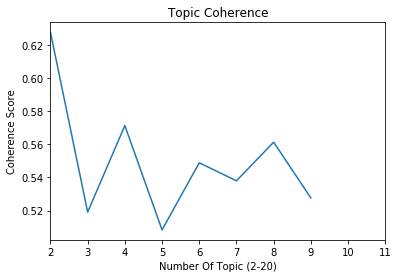

In [26]:
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

k = []

for i in range(2,10):
    k.append(i)

x = numpy.array(k)
y = numpy.array(coherence_score)
plt.title('Topic Coherence')
plt.plot(x,y)
plt.xlim(2,11)
plt.xlabel('Number Of Topic (2-20)')
plt.ylabel('Coherence Score')
plt.show()

In [27]:
new_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word=id2word, num_topics=4, passes=30, iterations=200)
new_model.print_topics(0)

[(2,
  '0.028*"코인" + 0.022*"결제" + 0.014*"다날" + 0.013*"캐리프로토콜" + 0.010*"상장" + 0.010*"이벤트" + 0.010*"페이코인" + 0.008*"사용" + 0.007*"생각" + 0.007*"에어드랍"'),
 (1,
  '0.017*"비트코인" + 0.014*"페이" + 0.014*"결제" + 0.013*"코인" + 0.011*"알트" + 0.011*"다날" + 0.009*"상장" + 0.009*"캐리프로토콜" + 0.008*"가맹점" + 0.008*"후오비"'),
 (3,
  '0.029*"결제" + 0.019*"다날" + 0.010*"이벤트" + 0.009*"삼성페" + 0.008*"할인" + 0.007*"캐리프로토콜" + 0.006*"소액_결제" + 0.005*"달콤커피" + 0.005*"가능" + 0.005*"휴대폰_결제"'),
 (0,
  '0.021*"결제" + 0.012*"캐리프로토콜" + 0.011*"코인" + 0.010*"다날" + 0.010*"진행" + 0.009*"페이_캐리프로토콜" + 0.009*"후오비_코리아" + 0.009*"가격" + 0.009*"페이코인" + 0.007*"이벤트"')]

In [28]:
# cm = CoherenceModel(model=new_model, corpus=corpus, coherence='u_mass')
# coherence = cm.get_coherence()
# print("Cpherence",coherence)
# print('\nPerplexity: ', model.log_perplexity(corpus))

In [29]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
prepared_data = gensimvis.prepare(new_model, corpus, id2word)
pyLDAvis.display(prepared_data)

/home/lab543/.local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
